# Movie Recommendation System

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
import ast 
from collections import Counter
import nltk
from sklearn.metrics.pairwise import cosine_similarity


## Pre Processing

In [7]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')
credits_df.head()
credits_df.shape


(4803, 4)

In [8]:
movies_df = pd.read_csv('tmdb_5000_movies.csv')
movies_df.head()
movies_df.shape

(4803, 20)

**Merging movies and credits datasets**

In [9]:
movies_df=pd.merge( left = movies_df, right = credits_df, on='title')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies_df.shape

(4808, 23)

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4808 non-null   int64  
 1   genres                4808 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4808 non-null   int64  
 4   keywords              4808 non-null   object 
 5   original_language     4808 non-null   object 
 6   original_title        4808 non-null   object 
 7   overview              4805 non-null   object 
 8   popularity            4808 non-null   float64
 9   production_companies  4808 non-null   object 
 10  production_countries  4808 non-null   object 
 11  release_date          4807 non-null   object 
 12  revenue               4808 non-null   int64  
 13  runtime               4806 non-null   float64
 14  spoken_languages      4808 non-null   object 
 15  status               

In [12]:
movies1=movies_df.copy()
movies2=movies_df.copy()

In [13]:
#droppind unnecessary columns
movies_df = movies_df[['movie_id','title','overview','genres','keywords','cast','crew']]
movies_df.head()


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
movies_df.isnull().sum()


movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [15]:
movies_df.dropna(inplace=True)
movies_df.isnull().sum()



movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [16]:
movies_df.duplicated().sum()

0

In [17]:
movies_df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [18]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
# Duartion of the data
movies1['release_date'] = pd.to_datetime(movies1['release_date'])
print(movies1['release_date'].max()-movies1['release_date'].min())

36852 days 00:00:00


C:\Users\BATTULA40\AppData\Local\Temp\ipykernel_6404\3635957949.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  movies1['release_date'] = pd.to_datetime(movies1['release_date'])


In [20]:
# Tidying up genre, production_companies and production_countries column
def func(obj):
    List = []
    for i in ast.literal_eval(obj):
        List.append(i['name'])
    return List

In [21]:
movies1['genres'] = movies1['genres'].apply(func)
movies1['production_companies'] = movies1['production_companies'].apply(func)
movies1['production_countries'] = movies1['production_countries'].apply(func)

# EDA
Analyzing the data using visual techniques

In [25]:
genres = Counter()
for i in range(movies1.shape[0]):
    for j in movies1.genres[i]:
        genres[j]+=1
Genres = pd.DataFrame.from_dict(genres, orient='index').reset_index()
Genres = Genres.rename(columns = {'index': 'Genres' ,0: 'Frequency'})

Genres.loc[Genres['Frequency'] < 200, 'Genres'] = 'Others'
fig = px.pie(Genres, values='Frequency', names='Genres',width=800,height=500)
fig.update_layout(
    title="Distribution of Genres",
    legend_title="Genre",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Top production Comapanies
prod = Counter()
for i in range(movies1.shape[0]):
    for j in movies1.production_companies[i]:
        prod[j]+=1
movie_prod = pd.DataFrame.from_dict(prod, orient='index').reset_index()
movie_prod = movie_prod.rename(columns = {'index': 'Production Company' ,0: 'Frequency'})
movie_prod=movie_prod.sort_values(by = ['Frequency'],ascending=False).reset_index().head(15)
movie_prod.drop(columns='index',axis=0,inplace=True)
movie_prod.style.background_gradient(cmap='RdBu_r')

,Production Company,Frequency
0,Warner Bros.,320
1,Universal Pictures,311
2,Paramount Pictures,285
3,Twentieth Century Fox Film Corporation,223
4,Columbia Pictures,201
5,New Line Cinema,165
6,Metro-Goldwyn-Mayer (MGM),122
7,Touchstone Pictures,118
8,Walt Disney Pictures,114
9,Relativity Media,102


In [ ]:
fig = px.bar( movie_prod, x='Production Company',y='Frequency', color ='Production Company',width=1000, height=650) 
fig.update_layout(
    title="Top 15 Production Companies",
    xaxis_title="Production Companies",
    yaxis_title="Frequency",
    legend_title="Production Companies",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.show()

In [ ]:
popular = movies1[['title','popularity']]
popular=popular.sort_values(by='popularity',ascending=False).reset_index().head(15)
popular.drop(columns='index',axis=0,inplace=True)

fig = px.scatter( popular, x='title',y='popularity', color ='popularity',size='popularity',width=950, height=650) 
fig.update_layout(
    title="Top 15 popular movies of all time",
    xaxis_title="Movies",
    yaxis_title="Popularity",
    legend_title="Popularity",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.show()

In [ ]:
pd.options.mode.chained_assignment = None
release_date=movies1[['title','release_date']]
release_date['release_date']=pd.to_datetime(release_date['release_date'])
release_date['Year']=release_date['release_date'].dt.year
release= release_date.groupby('Year')[['title']].count() 

fig = px.bar(release, x=release.index,y='title', color ='title',width=950, height=500) 
fig.update_layout(
    title="No. of movies produced over the years",
    xaxis_title="Time Period",
    yaxis_title="Frequency",
    legend_title="Frequency",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.show()

In [ ]:
lang= movies1.groupby('original_language')[['title']].count() 
lang.loc[lang['title'] < 20, 'title'] = 'Others'
fig = px.pie(lang, values='title', names=lang.index,width=800,height=500)
fig.update_layout(
    title="Distribution of Languages",
    legend_title="Language",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [ ]:
budget=movies1[['title','budget','revenue']].sort_values(by='budget',ascending=False).reset_index().head(15)
budget.drop(columns='index',axis=0,inplace=True)

fig = go.Figure(
    data=[
        go.Bar(
            name="Budget",
            x=budget["title"],
            y=budget["budget"],
            offsetgroup=0, 
            marker_color='rgb(116, 18, 25)'
        ),
        go.Bar(
            name="Revenue",
            x=budget["title"],
            y=budget["revenue"],
            offsetgroup=1,
            marker_color='rgb(56, 208, 95)'
        ),
    ],
    layout=go.Layout(
        title="Budget v/s Revenue of top 15 movies by budget",
        xaxis_title="Movies",
        yaxis_title="Price"
    )
)
fig.show()

In [ ]:
runtime=movies1[['title','runtime']].sort_values(by='runtime',ascending=False).reset_index().head(15)
runtime.drop(columns='index',axis=0,inplace=True)
runtime['runtime']=runtime['runtime']/60

fig=px.line(runtime,y='runtime',x='title')
fig.update_layout(
    title="Top 5 movies with highest runtime",
    yaxis_title="Time(in hours)",
    xaxis_title="Movies",
    font=dict(
        size=14
    )
)
fig.update_traces(mode='markers+lines')
fig.layout.template = 'plotly'
fig.show()

## 1. Simple recommendation system

**Recommendation based on popularity and ratings**



* The Simple Recommender offers __generalized recommendations__ to every user __based on movie popularity and (sometimes) genre__. 

* The __basic idea__ behind this recommender is that __movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience.__ 

* This model __does not give personalized recommendations__ based on the user.



In [ ]:

movies2['genres'] = movies2['genres'].apply(func)
movies2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,220000,"[Action, Crime, Thriller]",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4804,9000,"[Comedy, Romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4805,0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam


$\large Weighted\; Rating (WR) = (\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$
```
where,
    v is the number of votes for the movie
    m is the minimum votes required to be listed in the chart
    R is the average rating of the movie
    C is the mean vote across the whole report
```

In [ ]:
vote_counts = movies2[movies2['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movies2[movies2['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.653702163061564

* The next step, we need to determine an appropriate value for `m`, the minimum votes required to be listed in the chart. 

* We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.



In [ ]:
m = vote_counts.quantile(0.95)
m

3040.6499999999996

In [ ]:
# Pre-processing step for getting year from date by splliting it using '-'

movies2['year'] = pd.to_datetime(movies2['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

C:\Users\BATTULA40\AppData\Local\Temp\ipykernel_5828\2494533263.py:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
qualified = movies2[(movies2['vote_count'] >= m) & 
               (movies2['vote_count'].notnull()) & 
               (movies2['vote_average'].notnull())][['title', 
                                                'year', 
                                                'vote_count', 
                                                'vote_average', 
                                                'popularity', 
                                                'genres']]

qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(241, 6)

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [ ]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

In [ ]:
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
96,Inception,2010,13752,8,167.583710,"[Action, Thriller, Science Fiction, Mystery, A...",7.575155
65,The Dark Knight,2008,12002,8,187.322927,"[Drama, Action, Crime, Thriller]",7.525730
95,Interstellar,2014,10867,8,724.247784,"[Adventure, Drama, Science Fiction]",7.487025
662,Fight Club,1999,9413,8,146.757391,[Drama],7.427134
262,The Lord of the Rings: The Fellowship of the Ring,2001,8705,8,138.049577,"[Adventure, Fantasy, Action]",7.392603
3237,Pulp Fiction,1994,8428,8,121.463076,"[Thriller, Crime]",7.377933
1887,The Shawshank Redemption,1994,8205,8,136.747729,"[Drama, Crime]",7.365597
329,The Lord of the Rings: The Return of the King,2003,8064,8,123.630332,"[Adventure, Fantasy, Action]",7.357542
809,Forrest Gump,1994,7927,8,138.133331,"[Comedy, Drama, Romance]",7.349517
330,The Lord of the Rings: The Two Towers,2002,7487,8,106.914973,"[Adventure, Fantasy, Action]",7.322330


In [ ]:
s = movies2.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genre_movies = movies2.drop('genres', axis=1).join(s)
genre_movies.head(3).transpose()

In [ ]:
def build_chart(genre, percentile=0.85):
    df = genre_movies[genre_movies['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & 
                   (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: 
                        (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C),
                        axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

In [ ]:
build_chart('Action').head(15)

,title,year,vote_count,vote_average,popularity,wr
96,Inception,2010,13752,8,167.583710,7.643635
65,The Dark Knight,2008,12002,8,187.322927,7.600152
262,The Lord of the Rings: The Fellowship of the Ring,2001,8705,8,138.049577,7.480795
329,The Lord of the Rings: The Return of the King,2003,8064,8,123.630332,7.448806
330,The Lord of the Rings: The Two Towers,2002,7487,8,106.914973,7.416443
2917,Star Wars,1977,6624,8,126.393695,7.360261
1996,The Empire Strikes Back,1980,5879,8,78.517830,7.302273
1856,Scarface,1983,2948,8,70.105981,6.915541
0,Avatar,2009,11800,7,150.437577,6.759928
16,The Avengers,2012,11776,7,144.448633,6.759520


In [ ]:
build_chart('Romance').head(15)

,title,year,vote_count,vote_average,popularity,wr
809,Forrest Gump,1994,7927,8,138.133331,7.765517
25,Titanic,1997,7562,7,100.025899,6.864168
81,Maleficent,2014,4496,7,110.620647,6.787311
2003,Her,2013,4097,7,53.682367,6.770405
49,The Great Gatsby,2013,3769,7,61.196071,6.754353
2844,The Fault in Our Stars,2014,3759,7,74.358971,6.753828
2158,Eternal Sunshine of the Spotless Mind,2004,3652,7,56.481487,6.748070
2114,Edward Scissorhands,1990,3601,7,47.513630,6.745230
1701,Aladdin,1992,3416,7,92.982009,6.734367
2553,The Theory of Everything,2014,3311,7,61.182331,6.727779


## Content based Recommendation System

In [ ]:
movies_df['genres'] = movies_df['genres'].apply(func)
movies_df['keywords'] = movies_df['keywords'].apply(func)
movies_df['cast'] = movies_df['cast'].apply(func)

In [ ]:
def fetch_director(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
    return l
movies_df['crew'] = movies_df['crew'].apply(fetch_director)

In [ ]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [ ]:
movies_df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
movies_df['overview'] = movies_df['overview'].apply(lambda x:x.split())

In [ ]:
movies_df

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith]
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[Daniel Hsia]


In [ ]:
movies_df['tags'] = movies_df['overview']+movies_df['genres']+movies_df['keywords']+movies_df['cast']+movies_df['crew']
movies_df['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez',
 'Giovanni Ribisi',
 'Joel David Moore',
 'CCH Pounder',
 'Wes Studi',
 'Laz Alonso',
 'Dileep Rao',
 'Matt Gerald',
 'Sean Anthony Moran',
 'Jason Whyte',
 'Scott Lawrence',
 'Kelly Kilgour',
 'James Patrick Pitt',
 'Sean Patrick Murphy',
 'Peter Dillon',
 'Kevin Dorman',
 'Kel

In [ ]:
new_df = movies_df[['movie_id','title','tags']]
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))


In [ ]:
new_df

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [ ]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy Science Fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Giovanni Ribisi Joel David Moore CCH Pounder Wes Studi Laz Alonso Dileep Rao Matt Gerald Sean Anthony Moran Jason Whyte Scott Lawrence Kelly Kilgour James Patrick Pitt Sean Patrick Murphy Peter Dillon Kevin Dorman Kelson Henderson David Van Horn Jacob Tomuri Michael Blain-Rozgay Jon Curry Luke Hawker Woody Schultz Peter Mensah Sonia Yee Jahnel Curfman Ilram Choi Kyla Warren Lisa Roumain Debra Wilson Chris Mala Taylor Kibby Jodie Landau Julie Lamm Cullen B. Madden Joseph Brady Madden Frankie Torres Austin 

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to C:\Users\Chirag
[nltk_data]     G\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000,stop_words='english')

In [ ]:
cv.fit_transform(new_df['tags']).toarray().shape

(4806, 5000)

In [ ]:
vectors = cv.fit_transform(new_df['tags']).toarray()
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
len(cv.get_feature_names_out())

5000

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
new_df['tags'] = new_df['tags'].apply(stem)

In [ ]:
cosine_similarity(vectors)

array([[1.        , 0.09942063, 0.06930174, ..., 0.02882883, 0.03273658,
        0.02345899],
       [0.09942063, 1.        , 0.04614227, ..., 0.0422284 , 0.01598415,
        0.01145422],
       [0.06930174, 0.04614227, 1.        , ..., 0.02675959, 0.06077371,
        0.        ],
       ...,
       [0.02882883, 0.0422284 , 0.02675959, ..., 1.        , 0.06952347,
        0.04982042],
       [0.03273658, 0.01598415, 0.06077371, ..., 0.06952347, 1.        ,
        0.03771571],
       [0.02345899, 0.01145422, 0.        , ..., 0.04982042, 0.03771571,
        1.        ]])

In [ ]:
cosine_similarity(vectors).shape

(4806, 4806)

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
similarity[0].shape

(4806,)

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(47, 0.29020459939538484),
 (2409, 0.2859869694307458),
 (1321, 0.28077319087822056),
 (149, 0.2760180995475113),
 (2204, 0.2733592411557998)]

In [ ]:
def recommend(movie):
     movie_index = new_df[new_df['title'] == movie].index[0] 
     distances = similarity[movie_index]
     movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:10]
     for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Inception')

The Dark Knight Rises
Batman Begins
The Count of Monte Cristo
Vanilla Sky
The Helix... Loaded
The Pallbearer
A Very Long Engagement
Wuthering Heights
The Dark Knight


## Collaborative Based Recommendation System

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

In [ ]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

# changing the cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

# changing the crew column from json to string    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.iloc[25]

budget                                                          200000000
genres                                   ['Drama', 'Romance', 'Thriller']
homepage                                      http://www.titanicmovie.com
id                                                                    597
keywords                ['shipwreck', 'iceberg', 'ship', 'panic', 'tit...
original_language                                                      en
original_title                                                    Titanic
overview                84 years later, a 101-year-old woman named Ros...
popularity                                                     100.025899
production_companies    ['Paramount Pictures', 'Twentieth Century Fox ...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   1997-11-18
revenue                                                        1845034188
runtime                               

In [ ]:
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')
movies = movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [ ]:
movies.iloc[25]

id                                                              597
original_title                                              Titanic
genres                             ['Drama', 'Romance', 'Thriller']
cast              ['Kate Winslet', 'Leonardo DiCaprio', 'Frances...
vote_average                                                    7.5
director                                              James Cameron
keywords          ['shipwreck', 'iceberg', 'ship', 'panic', 'tit...
Name: 25, dtype: object

In [ ]:
movies.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

In [ ]:
movies.dtypes

id                  int64
original_title     object
genres             object
cast               object
vote_average      float64
director           object
keywords           object
dtype: object

# Working on genres column

In [ ]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

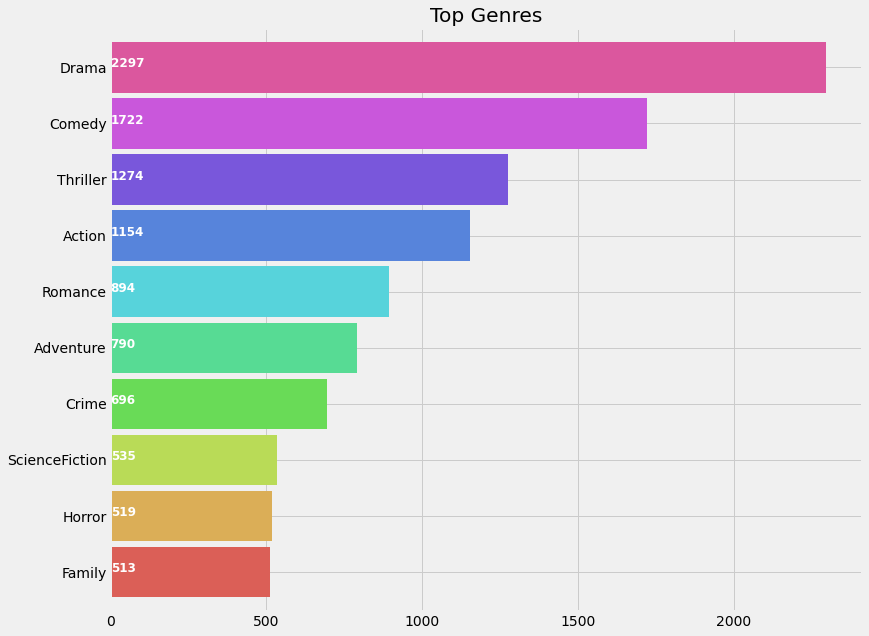

In [ ]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [ ]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [ ]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [ ]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [ ]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].iloc[0]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Working with cast column

In [ ]:
#movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
#movies['cast'] = movies['cast'].str.split(',')
movies['cast'].iloc[0]

"['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy', 'Peter Dillon', 'Kevin Dorman', 'Kelson Henderson', 'David Van Horn', 'Jacob Tomuri', 'Michael Blain-Rozgay', 'Jon Curry', 'Luke Hawker', 'Woody Schultz', 'Peter Mensah', 'Sonia Yee', 'Jahnel Curfman', 'Ilram Choi', 'Kyla Warren', 'Lisa Roumain', 'Debra Wilson', 'Chris Mala', 'Taylor Kibby', 'Jodie Landau', 'Julie Lamm', 'Cullen B. Madden', 'Joseph Brady Madden', 'Frankie Torres', 'Austin Wilson', 'Sara Wilson', 'Tamica Washington-Miller', 'Lucy Briant', 'Nathan Meister', 'Gerry Blair', 'Matthew Chamberlain', 'Paul Yates', 'Wray Wilson', 'James Gaylyn', 'Melvin Leno Clark III', 'Carvon Futrell', 'Brandon Jelkes', 'Micah Moch', 'Hanniyah Muhammad', 'Christopher Nolen', 'C

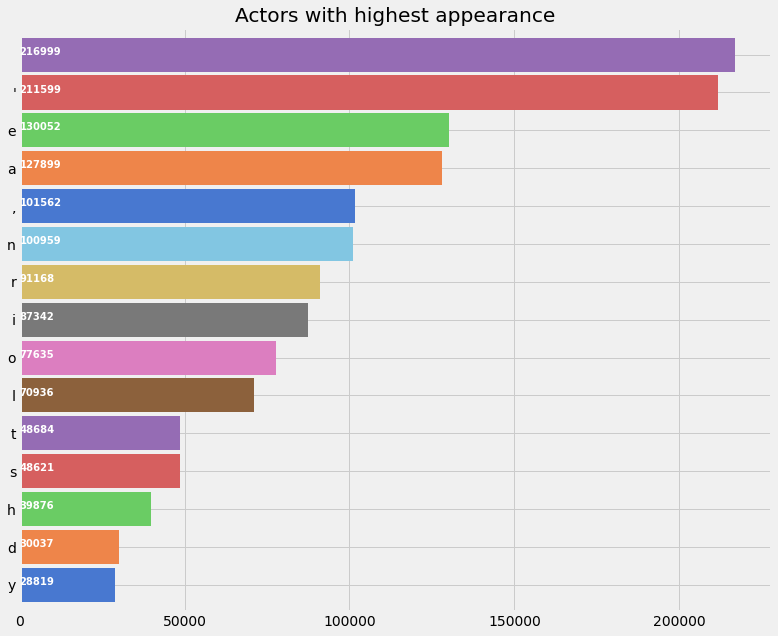

In [ ]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [ ]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [ ]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [ ]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [ ]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

# Working with director column

In [ ]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

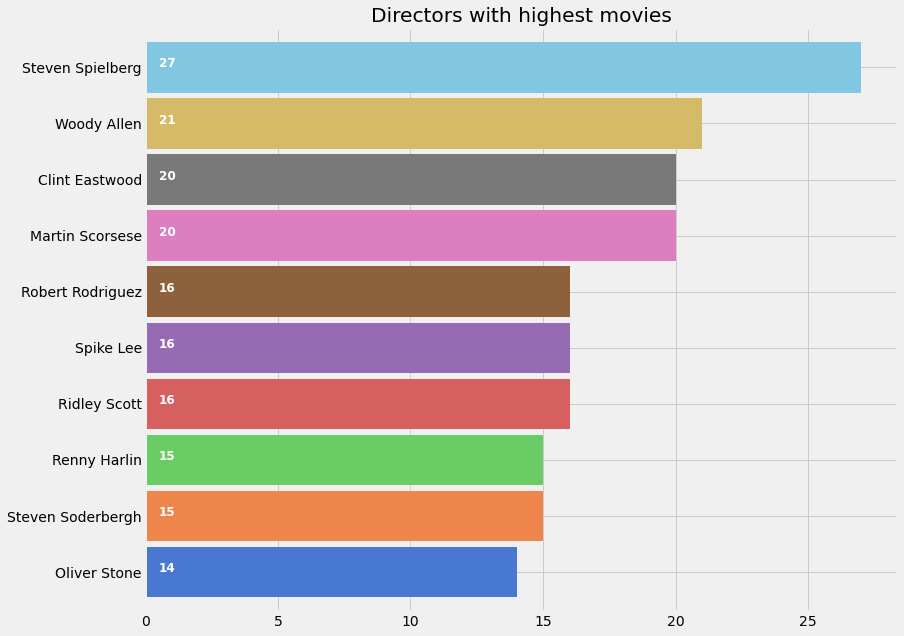

In [ ]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [ ]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [ ]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [ ]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",Sa,7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",Jo,6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]",Da,6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Ch,7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]",Ta,6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Working with keywords column

In [ ]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [ ]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [ ]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [ ]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']

# Similarity between movies
# Cosine similarity

In [ ]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [ ]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Score Prediction

In [ ]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [ ]:
predict_score('Godfather')

Selected Movie:  The Godfather: Part III

Recommended Movies: 

The Godfather: Part II | Genres: 'Crime','Drama' | Rating: 8.3
The Rainmaker | Genres: 'Crime','Drama','Thriller' | Rating: 6.7
Scarface | Genres: 'Action','Crime','Drama','Thriller' | Rating: 8.0
The Insider | Genres: 'Drama','Thriller' | Rating: 7.3
City Hall | Genres: 'Drama','Thriller' | Rating: 6.0
People I Know | Genres: 'Drama','Thriller' | Rating: 5.5
The Outsiders | Genres: 'Crime','Drama' | Rating: 6.9
The Godfather | Genres: 'Crime','Drama' | Rating: 8.4
Cidade de Deus | Genres: 'Crime','Drama' | Rating: 8.1
Insomnia | Genres: 'Crime','Mystery','Thriller' | Rating: 6.8


The predicted rating for The Godfather: Part III is: 7.200000
The actual rating for The Godfather: Part III is 7.100000


In [ ]:
predict_score('Avatar')

Selected Movie:  Avatar

Recommended Movies: 

Aliens | Genres: 'Action','Horror','ScienceFiction','Thriller' | Rating: 7.7
Clash of the Titans | Genres: 'Action','Adventure','Fantasy' | Rating: 5.6
AVP: Alien vs. Predator | Genres: 'Action','Adventure','ScienceFiction' | Rating: 5.5
Jurassic Park III | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 5.7
The Abyss | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 7.1
Jurassic Park | Genres: 'Adventure','ScienceFiction' | Rating: 7.6
G-Force | Genres: 'Action','Adventure','Comedy','Family','Fantasy' | Rating: 5.1
The Host | Genres: 'Action','Adventure','Romance','ScienceFiction','Thriller' | Rating: 6.0
Speed 2: Cruise Control | Genres: 'Action','Adventure','Thriller' | Rating: 4.1
Terminator 2: Judgment Day | Genres: 'Action','ScienceFiction','Thriller' | Rating: 7.7


The predicted rating for Avatar is: 6.210000
The actual rating for Avatar is 7.200000
